In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from matplotlib.colors import ListedColormap

In [7]:
df=pd.read_csv('/Iris.csv')
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [8]:
df = df.drop('Id',axis=1)
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
le = preprocessing.LabelEncoder() 
df['Species']= le.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [12]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [17]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [18]:
X_train.shape

(120, 4)

In [20]:
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [21]:
explained_variance

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

In [22]:
scores = X_train 
scores_df = pd.DataFrame(scores,columns=['PC1','PC2','PC3','PC4'])
scores_df.head(2)

,PC1,PC2,PC3,PC4
0,1.272282,0.357879,0.180337,-0.218684
1,0.152232,-0.299835,0.657130,-0.249321


In [23]:
scores_df['PC1'].head(2)

0    1.272282
1    0.152232
Name: PC1, dtype: float64

In [24]:
y_label = []

for i in y:
    if i == 0:
        y_label.append("Setosa")
    elif i == 1:
        y_label.append("Versicolor")
    else:
        y_label.append("Virginica")
        
Wines = pd.DataFrame(y_label,columns=['Species'])

df_scores = pd.concat([scores_df,Wines],axis=1)
df_scores.head()

,PC1,PC2,PC3,PC4,Species
0,1.272282,0.357879,0.180337,-0.218684,Setosa
1,0.152232,-0.299835,0.657130,-0.249321,Setosa
2,-2.187642,0.617154,-0.180887,0.003670,Setosa
3,0.941913,0.012181,0.329616,-0.012393,Setosa
4,1.762278,-0.271066,0.336679,0.092995,Setosa


In [25]:
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
pca.explained_variance_ratio_

array([0.72226528, 0.23974795])

In [26]:
np.identity(X.shape[1])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [27]:
components=pca.transform(np.identity(X.shape[1]))

In [28]:
pd.DataFrame(components,columns=['pc_1','pc_2'],index=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

,pc_1,pc_2
SepalLengthCm,1.000000e+00,-1.850372e-17
SepalWidthCm,-5.181041e-17,1.000000e+00
PetalLengthCm,-5.181041e-17,6.476301e-17
PetalWidthCm,-5.181041e-17,-3.585095e-17


In [30]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [31]:
y_pred=classifier.predict(X_test)

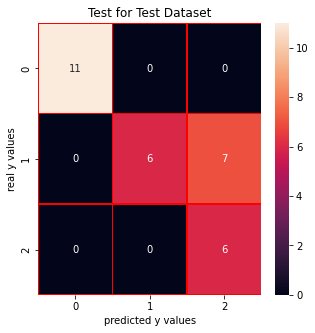

In [34]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [35]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30



In [37]:
print(accuracy_score(y_test,y_pred))

0.7666666666666667


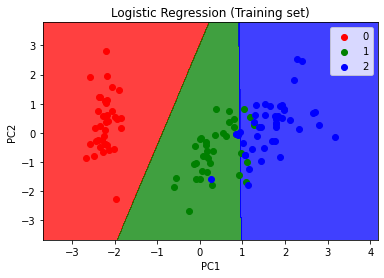

In [39]:

X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

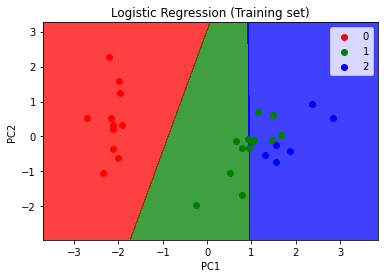

In [40]:
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()